In [114]:
import numpy as np
import pandas as pd
from preprocess import merge_parquets, sample_dat, drop_missing_vals
from visualize import boxplot, heatmap, lineplot
from modeling import decompose

In [116]:
print("### Data Preprocessing")

# Load and merge data
dir = '../data'
print("Merging parquet files...")
dat = merge_parquets(dir)

### Data Preprocessing
Merging parquet files...
concatenating all yellow_tripdata parquets


In [118]:
# Sample 30% of the data for efficiency
print("Sampling 30% of the data...")
sampled_dat = sample_dat(dat, 0.3, seed=1)


Sampling 30% of the data...


In [120]:
# Drop rows with missing values in critical columns
print("Dropping rows with missing values...")
sampled_dat = drop_missing_vals(sampled_dat, ['total_amount', 'passenger_count', 'trip_distance'])


Dropping rows with missing values...


In [122]:
# Converting passenger_count to integer type 
sampled_dat['passenger_count'] = pd.to_numeric(sampled_dat['passenger_count'], errors='coerce')
sampled_dat = sampled_dat.dropna(subset=['passenger_count'])
sampled_dat['passenger_count'] = sampled_dat['passenger_count'].astype(int)


In [124]:
# Filter out invalid passenger counts
valid_passenger_counts = [1, 2, 3, 4, 5, 6]
sampled_dat = sampled_dat[sampled_dat['passenger_count'].isin(valid_passenger_counts)]


In [159]:
# Section 2: Analysis
print("Analysis")
print("Impact of Passenger Count on Total Fare")


Analysis
Impact of Passenger Count on Total Fare


In [128]:
fare_analysis = sampled_dat.groupby('passenger_count')['total_amount'].agg(['mean', 'median', 'count'])
print("Fare Analysis (Filtered):")
print(fare_analysis)

Fare Analysis (Filtered):
                      mean  median    count
passenger_count                            
1                28.192996   20.93  8258607
2                32.010714   21.90  1664534
3                31.389563   21.84   413928
4                33.585382   22.60   233187
5                28.272217   21.00   145862
6                28.089843   21.00    94678


Visualization


/Users/omni/DS1007_FinalProject/code/visualize.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= xvar, y= yvar, data = dat, palette='Set3')


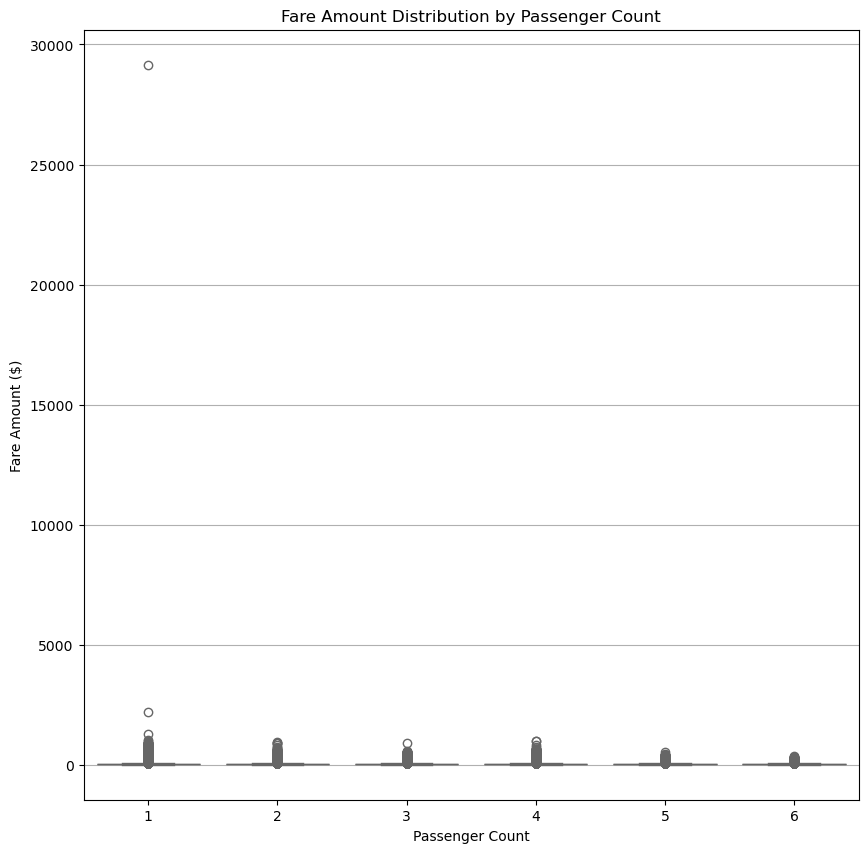

In [157]:
print("Visualization")
# Boxplot: Fare Distribution by Passenger Count
boxplot(
    dat=sampled_dat,
    xvar='passenger_count',
    yvar='total_amount',
    title='Fare Amount Distribution by Passenger Count',
    xlabel='Passenger Count',
    ylabel='Fare Amount ($)'
)

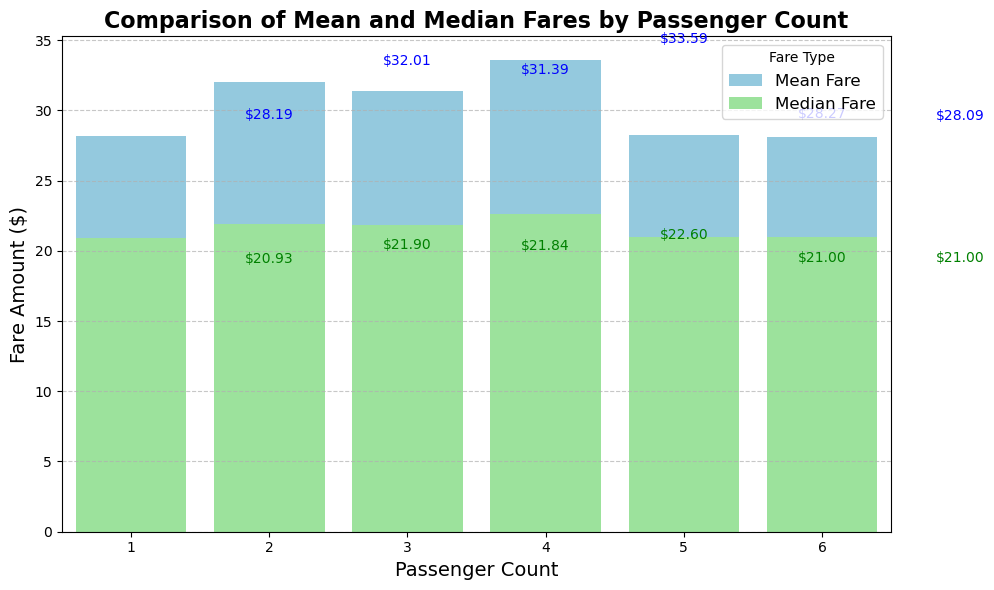

In [132]:
# Prepare data for visualization
fare_summary = fare_analysis.copy()

# Barplot for Mean and Median Fares
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_summary, x='passenger_count', y='mean', color='skyblue', label='Mean Fare')
sns.barplot(data=fare_summary, x='passenger_count', y='median', color='lightgreen', label='Median Fare')

for index, row in fare_summary.iterrows():
    plt.text(index, row['mean'] + 1, f"${row['mean']:.2f}", ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(index, row['median'] - 1, f"${row['median']:.2f}", ha='center', va='top', fontsize=10, color='green')

# Titles and Labels
plt.title('Comparison of Mean and Median Fares by Passenger Count', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Count', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.legend(title='Fare Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


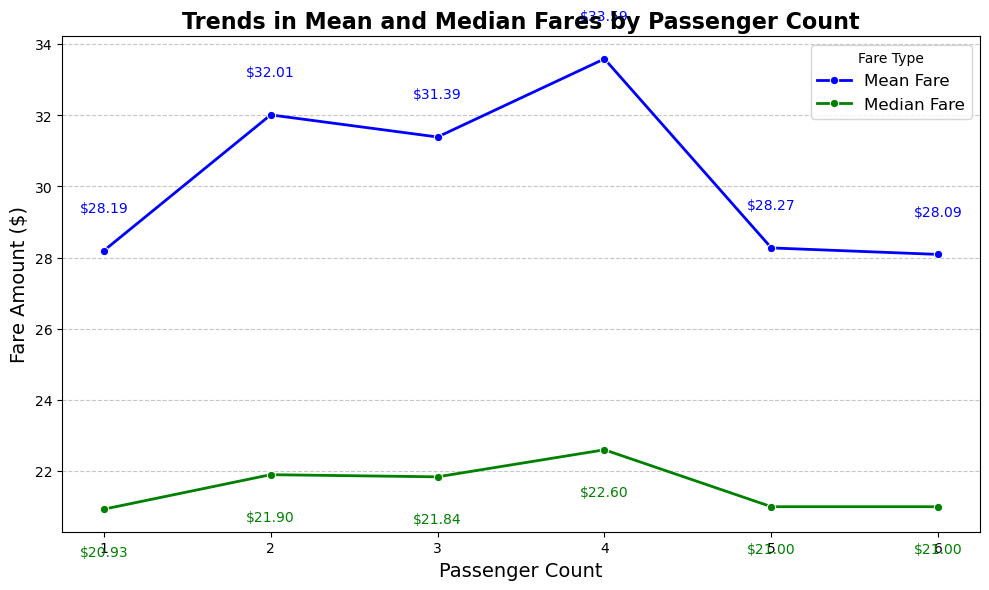

In [138]:
# Lineplot for Mean and Median Fares
fare_summary = fare_analysis.copy()
plt.figure(figsize=(10, 6))
sns.lineplot(data=fare_summary, x='passenger_count', y='mean', label='Mean Fare', marker='o', color='blue', linewidth=2)
sns.lineplot(data=fare_summary, x='passenger_count', y='median', label='Median Fare', marker='o', color='green', linewidth=2)

for index, row in fare_summary.iterrows():
    plt.text(index, row['mean'] + 1, f"${row['mean']:.2f}", ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(index, row['median'] - 1, f"${row['median']:.2f}", ha='center', va='top', fontsize=10, color='green')
# Titles and Labels
plt.title('Trends in Mean and Median Fares by Passenger Count', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Count', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Fare Type', fontsize=12)
plt.tight_layout()
plt.show()


# Fare Analysis: Observations from NYC Taxi Fare Data

The analysis of NYC taxi fare data 2023 suggests that the number of passengers does not have a significant impact on the fare amounts. Below are the key findings:

## 1. **Mean Fare**
- The average fare for a single passenger is **$32.01**.  
- The mean fare gradually increases, peaking at **$33.58** for 4 passengers.  
- For groups of **5-6 passengers**, the mean fare decreases slightly, indicating potential group discounts or fare adjustments for larger groups.  

Overall, these variations in mean fare are relatively small, showing limited dependence on passenger count.

## 2. **Median Fare**
- The median fare remains consistently around **$22.60** across all passenger counts.  
- This stability highlights that most trips are priced within a narrow range, regardless of the number of passengers.  

### Conclusion
The data indicates that passenger count has a minimal effect on taxi fare amounts. The slight variations in mean fare are overshadowed by the stability of median fares, reflecting a uniform fare structure in NYC taxis.
